In [68]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

'''
callback 함수로 내가 설정한 metric에 도달했다면 조기 종료 할 수 있다.
'''
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

2.3.0


In [69]:
#Fashion MNIST datasets
mnist = keras.datasets.fashion_mnist

In [70]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


60000
60000


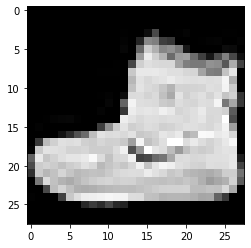

In [71]:
import numpy as np
np.set_printoptions(linewidth=200)
'''
linewidth : int, optional
The number of characters per line for the purpose of inserting line breaks (default 75).
=> 1줄당 문자 수 (기본값 75)

threshold : int, optional
Total number of array elements which trigger summarization rather than full repr (default 1000).
=> 1개의 배열당 총 element 갯수 (기본값 1000)
'''
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap='gray')
print(len(training_images))
print(len(training_labels))

In [72]:
# normalizing
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [73]:
model = keras.models.Sequential([keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation=tf.nn.relu),
                                 keras.layers.Dense(10, activation=tf.nn.softmax)])


In [74]:
callbacks = myCallback()
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

Epoch 1/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4933 - accuracy: 0.8249

In [75]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 649us/step - loss: 0.3323 - accuracy: 0.8788


[0.3323154151439667, 0.8787999749183655]

In [76]:
'''
모델을 학습할 때 10개의 종류를 가지고 학습을 시켰기 때문에 10(0~9)개의 데이터로 출력.
np.argmax로 가장 큰 값을 가진 index를 구해보면 9가 출력됨을 알 수 있다.
'''
classifications = model.predict(test_images)
print(classifications[0])
print(np.argmax(classifications[0]))
print(test_labels[0])

[3.8397525e-06 5.8588824e-08 4.6184874e-07 3.6599111e-08 3.9894505e-07 2.1886963e-02 2.6151793e-06 1.1804533e-01 8.7532108e-06 8.6005151e-01]
9
9
